Regression 

In [1]:
import torch 
import torch.nn as nn

import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('./data/NYCTaxiFares.csv')

In [3]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [5]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [6]:
df['dist_km'] = haversine_distance(df,'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

In [7]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km'],
      dtype='object')

In [8]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [13]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [14]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [16]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [17]:
df['pickup_datetime']

0        2010-04-19 08:17:56+00:00
1        2010-04-17 15:43:53+00:00
2        2010-04-17 11:23:26+00:00
3        2010-04-11 21:25:03+00:00
4        2010-04-17 02:19:01+00:00
                    ...           
119995   2010-04-18 14:33:03+00:00
119996   2010-04-23 10:27:48+00:00
119997   2010-04-18 18:50:40+00:00
119998   2010-04-13 08:14:44+00:00
119999   2010-04-17 16:00:14+00:00
Name: pickup_datetime, Length: 120000, dtype: datetime64[ns, UTC]

In [18]:
df['pickup_datetime'][0]

Timestamp('2010-04-19 08:17:56+0000', tz='UTC')

In [19]:
my_time = df['pickup_datetime'][0]

In [20]:
my_time

Timestamp('2010-04-19 08:17:56+0000', tz='UTC')

In [21]:
my_time.hour

8

In [22]:
df['EDTdate'] = df['pickup_datetime']-pd.Timedelta(hours=4)

In [23]:
df['Hour'] = df['EDTdate'].dt.hour

In [24]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22


In [25]:
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')

In [26]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [27]:
df['Weekday'] = df['EDTdate'].dt.strftime("%a")

In [28]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [26]:
#df['Weekday'] = df['EDTdate'].dt.dayofweek

In [27]:
# df.head()

In [28]:
#how to convert categorical variable 

In [29]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [30]:
cat_cols = ['Hour','AMorPM','Weekday']   # categorical
cont_cols = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','dist_km']   #continuous 

In [31]:
y_col = ['fare_amount']

In [32]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [33]:
# going to chnage hour to categiry 

In [33]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [34]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [35]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [36]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): ['am', 'pm']

In [37]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [38]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [39]:
df['AMorPM'].cat.codes

0         0
1         0
2         0
3         1
4         1
         ..
119995    0
119996    0
119997    1
119998    0
119999    1
Length: 120000, dtype: int8

In [40]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [41]:
df['Weekday'].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [42]:
 df['Weekday'].cat.codes

0         1
1         2
2         2
3         3
4         0
         ..
119995    3
119996    0
119997    3
119998    5
119999    2
Length: 120000, dtype: int8

In [43]:
df['Weekday'].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [44]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [45]:
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [46]:
cats = np.stack([hr,ampm,wkdy],axis=1)

In [47]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [49]:
# cats = np.stack([df[col].cat.codes.values for col in cat_cols],1)

In [48]:
cats = torch.tensor(cats,dtype=torch.int64)

In [49]:
conts = np.stack([df[col].values for col in cont_cols],axis=1)

In [50]:
conts

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [51]:
conts = torch.tensor(conts,dtype=torch.float)

In [52]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [53]:
# need to convert the labels into tensor 

In [54]:
y = torch.tensor(df[y_col].values,dtype=torch.float) #.reshape(-1,1)

In [55]:
y

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

In [56]:
cats.shape

torch.Size([120000, 3])

In [57]:
conts.shape

torch.Size([120000, 6])

In [58]:
y.shape

torch.Size([120000, 1])

In [59]:
# setup our pytorch embedding sizes for our categorical colums ( create lookup table,- one hod encoding)

In [60]:
cat_szs = [len(df[col].cat.categories)for col in cat_cols]   # it wil counts how many unique categories are present.

In [61]:
cat_szs    # we have 24 hours in a day, two was AMorPM, 7 weekdays

[24, 2, 7]

In [62]:
# general rule div by 2 

emb_szs = [(size,min(50,(size+1)//2)) for size in cat_szs]

In [64]:
emb_szs    # no. of categories , embedding dimentions 

[(24, 12), (2, 1), (7, 4)]

In [65]:
cats

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])

In [66]:
catz = cats[:2]

In [67]:
catz      # Hours of the day , AM& PM , day of the week

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [68]:
[nn.Embedding(ni,nf) for ni,nf in emb_szs]

[Embedding(24, 12), Embedding(2, 1), Embedding(7, 4)]

In [69]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])

In [70]:
selfembeds   # c the embedding layer: 1 for 24 hours, 1 for AM& PM and 1 for weekdays

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [71]:
# Forward Method (cats)

embeddingz = []

for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [72]:
embeddingz

[tensor([[ 0.7121,  1.2027, -2.0206, -0.2150,  0.5045,  0.5866,  0.1798, -2.1177,
           1.8601,  0.7614,  2.0762,  0.8613],
         [ 0.2540,  0.6473, -0.5594, -0.8075,  0.2981, -0.6691, -0.0770,  1.0813,
           0.8870, -0.5710, -0.5449,  0.3439]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.9622],
         [-0.9622]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.2688,  0.3603,  0.3320, -1.7857],
         [ 0.2263,  1.7995, -0.1902,  0.2157]], grad_fn=<EmbeddingBackward0>)]

In [73]:
z = torch.cat(embeddingz,1)      # Final shape of z: (3, 17)

In [74]:
z

tensor([[ 0.7121,  1.2027, -2.0206, -0.2150,  0.5045,  0.5866,  0.1798, -2.1177,
          1.8601,  0.7614,  2.0762,  0.8613, -0.9622,  0.2688,  0.3603,  0.3320,
         -1.7857],
        [ 0.2540,  0.6473, -0.5594, -0.8075,  0.2981, -0.6691, -0.0770,  1.0813,
          0.8870, -0.5710, -0.5449,  0.3439, -0.9622,  0.2263,  1.7995, -0.1902,
          0.2157]], grad_fn=<CatBackward0>)

In [75]:
selfembdrop = nn. Dropout(0.4)

In [76]:
z = selfembdrop(z)

In [77]:
z

tensor([[ 1.1869,  2.0045, -3.3676, -0.3583,  0.0000,  0.0000,  0.2996, -0.0000,
          3.1002,  0.0000,  0.0000,  1.4355, -1.6037,  0.4480,  0.0000,  0.5534,
         -2.9762],
        [ 0.4233,  1.0788, -0.9323, -0.0000,  0.0000, -1.1151, -0.0000,  1.8021,
          1.4784, -0.0000, -0.9082,  0.5732, -1.6037,  0.0000,  2.9991, -0.3171,
          0.3595]], grad_fn=<MulBackward0>)

In [78]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [79]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [200,100], p=0.4)

In [80]:
model.cuda()

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [81]:
criterion = nn.MSELoss()  # we'll convert this to RMSE later
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # 0.01 if it take 30 min

In [82]:
batch_size = 60000
test_size = int(batch_size * 0.2)


In [88]:
# data shufled already 
cat_train = cats[:batch_size-test_size].cuda()
cat_test = cats[batch_size-test_size:batch_size].cuda()
con_train = conts[:batch_size-test_size].cuda()
con_test = conts[batch_size-test_size:batch_size].cuda()


In [92]:
y_train = y[:batch_size-test_size].cuda()
y_test = y[batch_size-test_size:batch_size].cuda()

In [93]:
len(cat_train)

48000

In [94]:
len(cat_test)

12000

In [95]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train,con_train)
    loss = torch.sqrt(criterion(y_pred,y_train)) # RMSE
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i}  loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
duration = time.time() - start_time
print(f'Training took {duration/60} minutes')

epoch: 1  loss: 12.59292984008789
epoch: 11  loss: 11.689481735229492
epoch: 21  loss: 11.121023178100586
epoch: 31  loss: 10.737072944641113
epoch: 41  loss: 10.454681396484375
epoch: 51  loss: 10.230179786682129
epoch: 61  loss: 10.032244682312012
epoch: 71  loss: 9.843574523925781
epoch: 81  loss: 9.63805866241455
epoch: 91  loss: 9.433727264404297
epoch: 101  loss: 9.170388221740723
epoch: 111  loss: 8.891502380371094
epoch: 121  loss: 8.571239471435547
epoch: 131  loss: 8.220476150512695
epoch: 141  loss: 7.809628486633301
epoch: 151  loss: 7.382071018218994
epoch: 161  loss: 6.916611194610596
epoch: 171  loss: 6.436147212982178
epoch: 181  loss: 5.953526973724365
epoch: 191  loss: 5.474286079406738
epoch: 201  loss: 5.04177188873291
epoch: 211  loss: 4.638919353485107
epoch: 221  loss: 4.297278881072998
epoch: 231  loss: 4.087718486785889
epoch: 241  loss: 3.9399466514587402
epoch: 251  loss: 3.8340320587158203
epoch: 261  loss: 3.794628143310547
epoch: 271  loss: 3.7803118228912

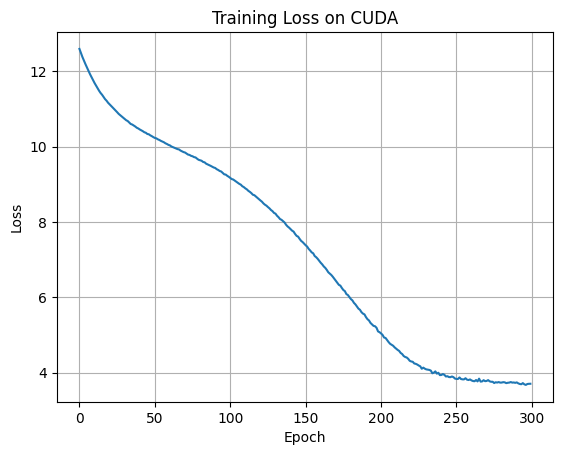

In [101]:
# Convert each tensor in the list to a NumPy array
losses_numpy = [loss.detach().cpu().numpy() for loss in losses]

plt.plot(range(len(losses_numpy)), losses_numpy)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss on CUDA')
plt.grid(True)
plt.show()


In [ ]:
# Validate the model

In [102]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))

In [103]:
loss

tensor(3.5963, device='cuda:0')

In [104]:
for i in range(10):
    print(f'{i}.) Predicted: {y_val[i]}')

0.) Predicted: tensor([2.8363], device='cuda:0')
1.) Predicted: tensor([22.7768], device='cuda:0')
2.) Predicted: tensor([7.3654], device='cuda:0')
3.) Predicted: tensor([12.8983], device='cuda:0')
4.) Predicted: tensor([4.9010], device='cuda:0')
5.) Predicted: tensor([4.5819], device='cuda:0')
6.) Predicted: tensor([4.7924], device='cuda:0')
7.) Predicted: tensor([15.7602], device='cuda:0')
8.) Predicted: tensor([7.7557], device='cuda:0')
9.) Predicted: tensor([10.7622], device='cuda:0')


In [105]:
for i in range(10):
    print(f'{i}.) Predicted: {y_val[i].item():8.2f} True: {y_test[i].item():8.2f}')

0.) Predicted:     2.84 True:     2.90
1.) Predicted:    22.78 True:     5.70
2.) Predicted:     7.37 True:     7.70
3.) Predicted:    12.90 True:    12.50
4.) Predicted:     4.90 True:     4.10
5.) Predicted:     4.58 True:     5.30
6.) Predicted:     4.79 True:     3.70
7.) Predicted:    15.76 True:    14.50
8.) Predicted:     7.76 True:     5.70
9.) Predicted:    10.76 True:    10.10


In [106]:
for i in range(10):
    diff = np.abs(y_val[i].item()-y_test[i].item())
    print(f'{i}.) Predicted: {y_val[i].item():8.2f} True: {y_test[i].item():8.2f} Diff: {diff:8.2f}')

0.) Predicted:     2.84 True:     2.90 Diff:     0.06
1.) Predicted:    22.78 True:     5.70 Diff:    17.08
2.) Predicted:     7.37 True:     7.70 Diff:     0.33
3.) Predicted:    12.90 True:    12.50 Diff:     0.40
4.) Predicted:     4.90 True:     4.10 Diff:     0.80
5.) Predicted:     4.58 True:     5.30 Diff:     0.72
6.) Predicted:     4.79 True:     3.70 Diff:     1.09
7.) Predicted:    15.76 True:    14.50 Diff:     1.26
8.) Predicted:     7.76 True:     5.70 Diff:     2.06
9.) Predicted:    10.76 True:    10.10 Diff:     0.66


In [107]:
# Save the model 

torch.save(model.state_dict(),'MM_TaxiModel.pt')